In [1]:
import os
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    average_precision_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from measuring_performance import plot_loss_per_epoch
from sound_utils import extract_signal_features, generate_dataset, load_sound_file

In [2]:
normal_files_id0 = os.listdir(r"6_dB_fan\fan\id_00\normal")
normal_files_id2 = os.listdir(r"6_dB_fan\fan\id_02\normal")
normal_files_id4 = os.listdir(r"6_dB_fan\fan\id_04\normal")
normal_files_id6 = os.listdir(r"6_dB_fan\fan\id_06\normal")
abnormal_files_id0 = os.listdir(r"6_dB_fan\fan\id_00\abnormal")
abnormal_files_id2 = os.listdir(r"6_dB_fan\fan\id_02\abnormal")
abnormal_files_id4 = os.listdir(r"6_dB_fan\fan\id_04\abnormal")
abnormal_files_id6 = os.listdir(r"6_dB_fan\fan\id_06\abnormal")
n=[]
y=[]
for i in normal_files_id0:
    t=""
    t = r"6_dB_fan\fan\id_00\normal\\" + i
    n.append(t)
for i in normal_files_id2:
    t=""
    t = r"6_dB_fan\fan\id_02\normal\\" + i
    n.append(t)
for i in normal_files_id4:
    t=""
    t = r"6_dB_fan\fan\id_04\normal\\" + i
    n.append(t)
for i in normal_files_id6:
    t=""
    t = r"6_dB_fan\fan\id_06\normal\\" + i
    n.append(t)

for i in abnormal_files_id0:
    u=""
    u = r"6_dB_fan\fan\id_00\abnormal\\" + i
    y.append(u)
for i in abnormal_files_id2:
    u=""
    u = r"6_dB_fan\fan\id_02\abnormal\\" + i
    y.append(u)
for i in abnormal_files_id4:
    u=""
    u = r"6_dB_fan\fan\id_04\abnormal\\" + i
    y.append(u)
for i in abnormal_files_id6:
    u=""
    u = r"6_dB_fan\fan\id_06\abnormal\\" + i
    y.append(u)

normal_files=n
abnormal_files=y
normal_labels = list(np.zeros(len(normal_files)))
abnormal_labels = list(np.ones(len(abnormal_files)))
file_dict = {"Files":normal_files+abnormal_files,
             "Class":normal_labels+abnormal_labels}

In [3]:
df=pd.DataFrame(file_dict)
df

Files  Class
0       6_dB_fan\fan\id_00\normal\\00000000.wav    0.0
1       6_dB_fan\fan\id_00\normal\\00000001.wav    0.0
2       6_dB_fan\fan\id_00\normal\\00000002.wav    0.0
3       6_dB_fan\fan\id_00\normal\\00000003.wav    0.0
4       6_dB_fan\fan\id_00\normal\\00000004.wav    0.0
...                                         ...    ...
5199  6_dB_fan\fan\id_06\abnormal\\00000356.wav    1.0
5200  6_dB_fan\fan\id_06\abnormal\\00000357.wav    1.0
5201  6_dB_fan\fan\id_06\abnormal\\00000358.wav    1.0
5202  6_dB_fan\fan\id_06\abnormal\\00000359.wav    1.0
5203  6_dB_fan\fan\id_06\abnormal\\00000360.wav    1.0

[5204 rows x 2 columns]

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
normal_signal,sr = librosa.load(normal_files[10])
abnormal_signal,sr = librosa.load(abnormal_files[10])
#normal_files[10]

Text(0.5, 1.0, 'Both Signals')

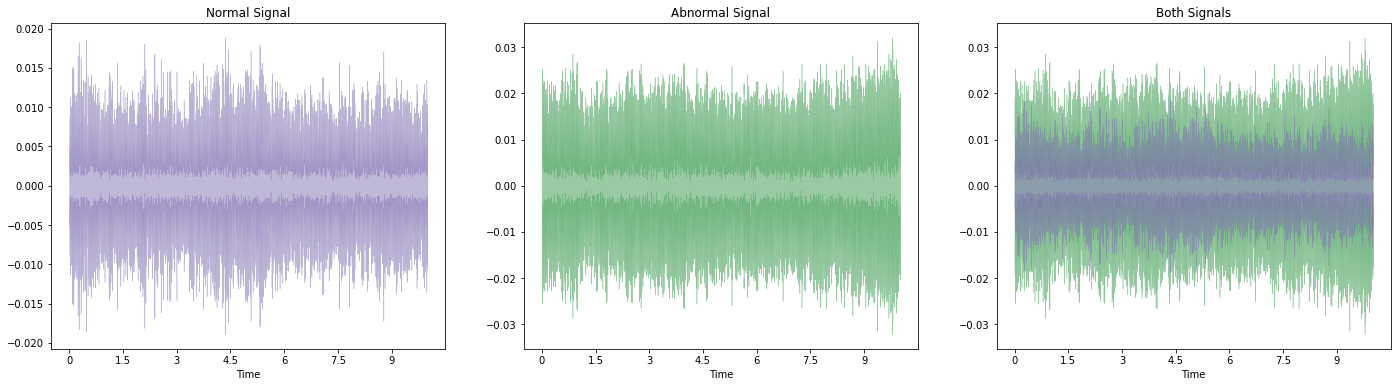

In [5]:
fig = plt.figure(figsize=(24, 6))
plt.subplot(1, 3, 1)
librosa.display.waveshow(normal_signal,sr=sr,alpha=0.5,color=colors[3],linewidth=0.5,label="Normal Signal",)
plt.title("Normal Signal")
plt.subplot(1, 3, 2)
librosa.display.waveshow(abnormal_signal,sr=sr,alpha=0.6,color=colors[1],linewidth=0.5,label="Abnormal Signal",)
plt.title("Abnormal Signal")
plt.subplot(1, 3, 3)
librosa.display.waveshow(abnormal_signal,sr=sr,alpha=0.6,color=colors[1],linewidth=0.5,label="Abnormal Signal",)
librosa.display.waveshow(normal_signal,sr=sr,alpha=0.5,color=colors[3],linewidth=0.5,label="Normal Signal",)
plt.title("Both Signals")

<ipython-input-6-b494b3814442>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_facecolor("#D8D6D5")


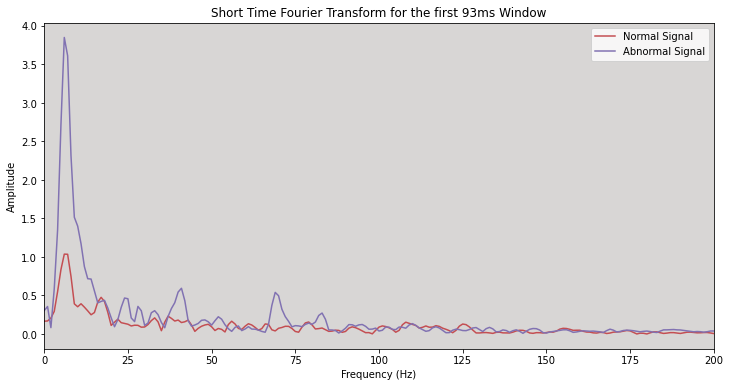

In [6]:
n_fft = 2048
normal_stft = np.abs(librosa.stft(normal_signal[:n_fft], n_fft=n_fft, hop_length=n_fft + 1))
abnormal_stft = np.abs(librosa.stft(abnormal_signal[:n_fft], n_fft=n_fft, hop_length=n_fft + 1))
fig = plt.figure(figsize=(12, 6))
plt.plot(normal_stft, color=colors[2], alpha=1, label="Normal Signal")
plt.plot(abnormal_stft, color=colors[3], alpha=1, label="Abnormal Signal")
plt.title(f"Short Time Fourier Transform for the first {n_fft / sr * 1000:.0f}ms Window")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.axes().set_facecolor("#D8D6D5")
plt.xlim(0, 200)
plt.show()


Text(0, 0.5, 'Frequency (Hz)')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


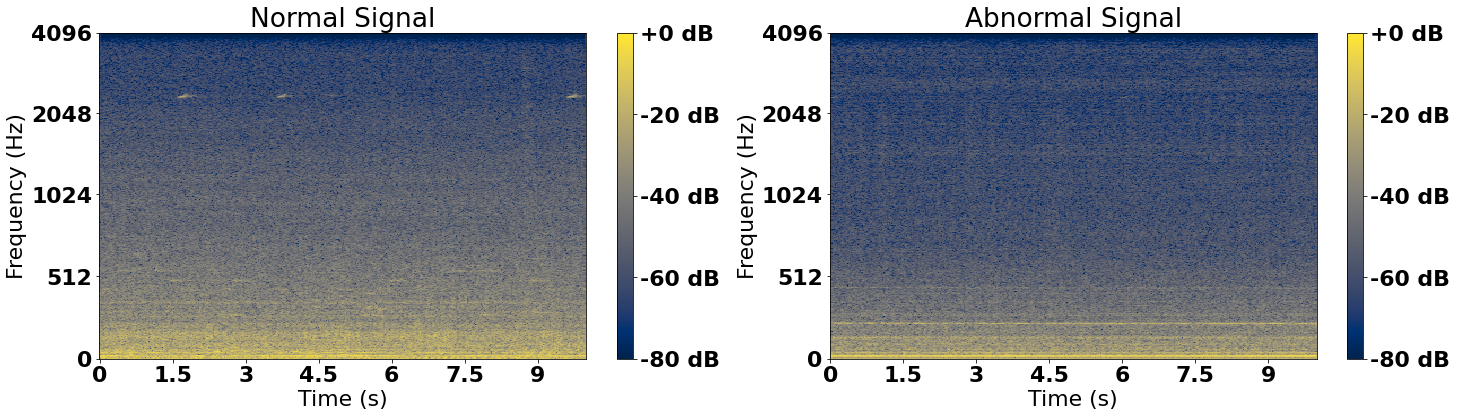

In [7]:
hop_length = 512
normal_stft = np.abs(librosa.stft(normal_signal, n_fft=n_fft, hop_length=hop_length))
normal_spectrogram = librosa.amplitude_to_db(normal_stft, ref=np.max)
abnormal_stft = np.abs(librosa.stft(abnormal_signal, n_fft=n_fft, hop_length=hop_length))
abnormal_spectrogram = librosa.amplitude_to_db(abnormal_stft, ref=np.max)
fig = plt.figure(figsize=(24, 6))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.subplot(1, 2, 1)
librosa.display.specshow(normal_spectrogram, sr=sr, x_axis="time", y_axis="mel", cmap="cividis")
plt.ylim([0,4096])
plt.title("Normal Signal")
plt.colorbar(format="%+2.f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.subplot(1, 2, 2)
librosa.display.specshow(abnormal_spectrogram, sr=sr, x_axis="time", y_axis="mel", cmap="cividis")
plt.title("Abnormal Signal")
plt.ylim([0,4096])
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

In [9]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [10]:
n_df=df[df['Class']==0]
normal_files=n_df['Files'].tolist()
normal_labels=n_df['Class'].tolist()


In [11]:
ab_df=df[df['Class']==1]
abnormal_files=ab_df['Files'].tolist()
abnormal_labels=ab_df['Class'].tolist()

In [12]:
import pickle
def dump_pickle(file_path, obj):
    with open(file_path, "wb") as file:
        pickle.dump(obj, file)

In [13]:
train_files, test_files, train_labels, test_labels = train_test_split(
    normal_files, normal_labels, train_size=0.8, random_state=42, shuffle=True
)

In [14]:
test_files+=abnormal_files
test_labels+=abnormal_labels

In [15]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)
print(
    f"Train set has {train_labels.shape[0]} signals including abnormal {train_labels.sum():.0f} signals, \
but test set has {test_labels.shape[0]} signals including abnormal {test_labels.sum():.0f} signals."
)

Train set has 3070 signals including abnormal 0 signals, but test set has 2134 signals including abnormal 1366 signals.


In [16]:
dataset = {
    "train_files": train_files,
    "test_files": test_files,
    "train_labels": train_labels,
    "test_labels": test_labels,
}


In [17]:
n_fft = 2048
hop_length = 512
n_mels = 64
frames = 3


In [20]:
n_fft = 2048
hop_length = 512
n_mels = 64
frames = 3

train_data_path = os.path.join("dataset", "train_data"  + ".pkl")

if os.path.exists(train_data_path):
    print("Train data already exists, loading from file...")
    train_data = load_pickle(train_data_path)

else:
    train_data = generate_dataset(
        train_files, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, frames=frames
    )
print(f"Train data has a {train_data.shape} shape.")

  0%|          | 0/3070 [00:00<?, ?it/s]

Train data has a (954770, 192) shape.


In [2]:
train_data.shape

In [21]:
def autoencoder(input_dims, model_name=None):
    input_layer = Input(shape=(input_dims,))
    output = Dense(128, activation="relu")(input_layer)
    output = Dense(64, activation="relu")(output)
    output = Dense(8, activation="relu")(output)
    output = Dense(64, activation="relu")(output)
    output = Dense(128, activation="relu")(output)
    output = Dense(input_dims, activation=None)(output)

    return Model(inputs=input_layer, outputs=output, name=model_name)

In [22]:
MODEL_NAME = "AutoEncoder"
model = autoencoder(n_mels * frames, model_name=MODEL_NAME)
print(model.summary())

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 192)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               24704     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 192)               

In [147]:
batch_size = 512
epochs = 200
model.compile(
    optimizer=Adam(learning_rate=1e-03),
    loss="mean_squared_error"
)

history = model.fit(
    train_data,
    train_data,
    batch_size=batch_size,
    epochs=epochs,
    verbose=False,
    callbacks=[EarlyStopping(monitor="val_loss", patience=10)],
    validation_split=0.1,
    shuffle=True
)

#model.save(os.path.join("AutoEncoder_frame3"+ ".h5"))

In [7]:
model=tf.keras.models.load_model('AutoEncoder_frame3.h5')


In [11]:
#pip install visualkeras


In [1]:
plot_loss_per_epoch(history, model_name=MODEL_NAME)

In [24]:
recon_errors = []
test_preds=[]
test_feat=[]
for index in tqdm(range(len(test_files))):
    signal, sr = load_sound_file(test_files[index])

    features = extract_signal_features(
        signal, sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, frames=frames
    )
    test_feat.append(features)
    predictions = model.predict(features)
    test_preds.append(predictions)
    mse = np.mean(np.mean(np.square(features - predictions), axis=1))
    recon_errors.append(mse)

  0%|          | 0/2134 [00:00<?, ?it/s]

In [25]:
len(recon_errors)

2134

In [26]:
stack = np.column_stack((range(len(recon_errors)), recon_errors))
score_false = stack[test_labels == 0][:, 1] #normal
score_true = stack[test_labels == 1][:, 1] #abnormal

# plot_histogram_by_class(
#     score_false,
#     score_true,
#     bins=[20, 30],
#     model_name=MODEL_NAME,
#     file_name=os.path.join("recon_error_dist.svg"),
# )

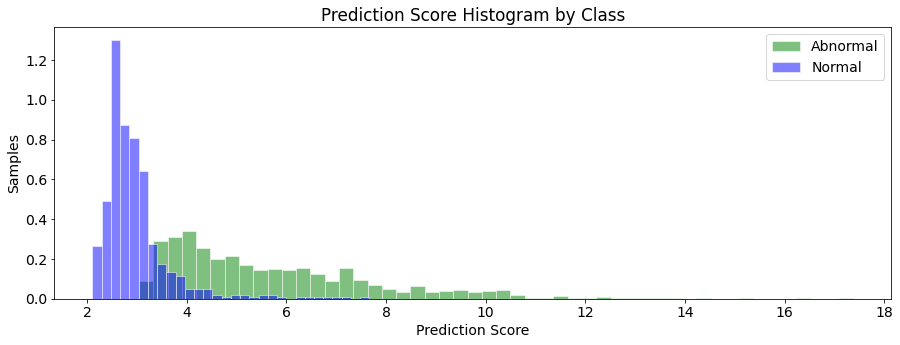

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
font = {'size' : 14}
matplotlib.rc('font', **font)
plt.figure(figsize=(15,5))
plt.title("Prediction Score Histogram by Class")
_=plt.hist(score_true, bins=50, density = 1, color ='green',alpha = 0.5,histtype='bar', ec='white',label="Abnormal")
_=plt.hist(score_false, bins=30, density = 1, color ='blue',alpha = 0.5,histtype='bar', ec='white',label="Normal")
_=plt.xlabel("Prediction Score")
_=plt.ylabel("Samples")
_=plt.legend()


In [28]:
def get_predictions(score,threshold):
    return np.where(score >= threshold, 1, 0)

In [29]:
THRESHOLD = 3.32
predictions = get_predictions(stack[:, 1], threshold=THRESHOLD)
print(
    f"Accuracy: {accuracy_score(test_labels, predictions):.2%}, \
Precision: {precision_score(test_labels, predictions):.2%}, \
Recall: {recall_score(test_labels, predictions):.2%}, \
F1: {f1_score(test_labels, predictions):.2%}")

Accuracy: 93.06%, Precision: 92.17%, Recall: 97.44%, F1: 94.73%


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Abnormal')]

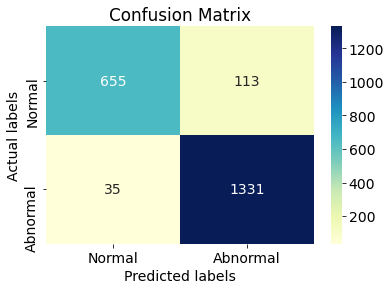

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Get the confusion matrix
cf_matrix = confusion_matrix(test_labels, predictions)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax, cmap="YlGnBu")
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Normal', 'Abnormal']); ax.yaxis.set_ticklabels(['Normal', 'Abnormal'])

Test-File: 6_dB_fan\fan\id_06\abnormal\\00000360.wav
Error:  5.9119763 | Predicted: Abnormal


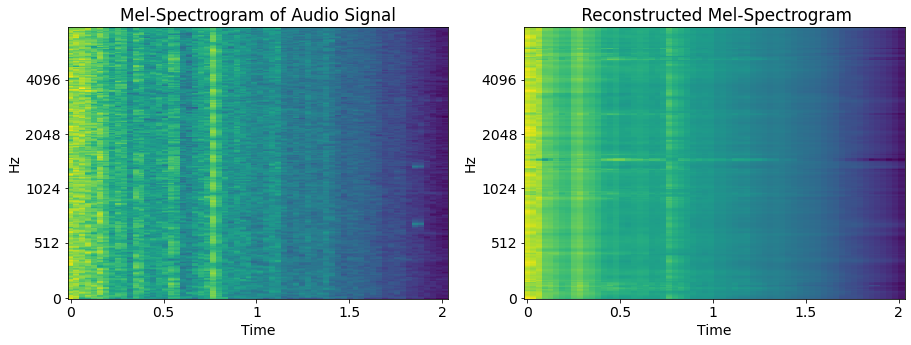

In [52]:
#Taking Normal file
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
def represent(test_files): 
    print("Test-File:",test_files)
    signal, sr = load_sound_file(test_files)
    features = extract_signal_features(
            signal, sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, frames=frames
        )
    predictions = model.predict(features)
    pr = np.mean(np.mean(np.square(features - predictions), axis=1))
    if(pr>3.3):
        print("Error: ",pr,'| Predicted: Abnormal')
    else:
        print("Error: ",pr,'| Predicted: Normal')
    f, axs = plt.subplots(2,2,figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title("Mel-Spectrogram of Audio Signal")
    librosa.display.specshow(
        features[:,:64], sr=sr, x_axis="time", y_axis="mel", cmap="viridis",hop_length=hop_length
    )
    plt.subplot(1,2,2)
    plt.title(" Reconstructed Mel-Spectrogram")
    librosa.display.specshow(
        predictions[:,:64], sr=sr, x_axis="time", y_axis="mel", cmap="viridis",hop_length=hop_length
    )
    

represent(test_files[-1])
ipd.Audio(test_files[-1],rate=sr)

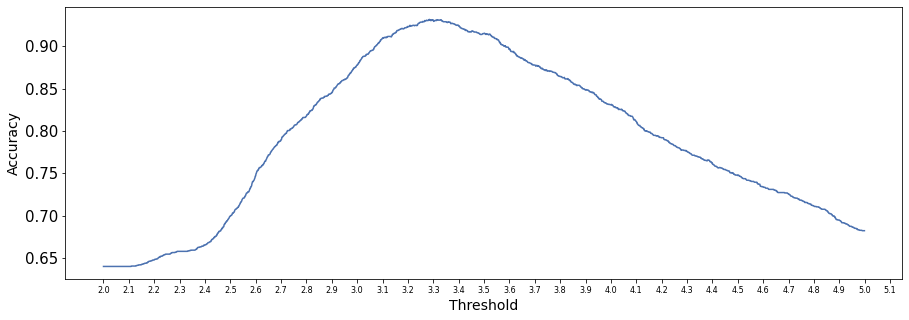

In [34]:
import matplotlib.pyplot as plt
a=[]
t=[]
for u in np.arange(2,5,0.001):
    t.append(u)
    THRESHOLD=u
    predictions = get_predictions(stack[:, 1], threshold=THRESHOLD)
    a.append(accuracy_score(test_labels, predictions))
plt.figure(figsize=(15,5))
plt.xticks(np.arange(np.min(t), np.max(t)+1, 0.1))
plt.plot(np.array(t),np.array(a))
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel("Threshold")
_=plt.ylabel("Accuracy")


In [61]:
# plot_roc_curve(
#     roc_curve(test_labels, recon_errors),
#     roc_auc_score(test_labels, recon_errors),
#     model_name=MODEL_NAME,
#     file_name=os.path.join("roc_curve.svg"),
# )


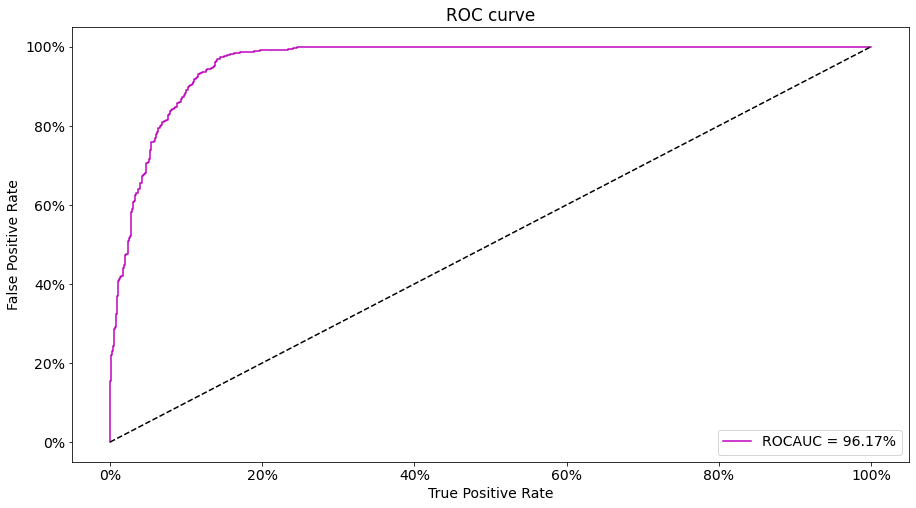

In [35]:
import matplotlib.ticker as mtick
plt.figure(figsize=(15,8))
fpr, tpr, _ = roc_curve(test_labels, recon_errors)
plt.plot(fpr,tpr,color='m',label=str("ROCAUC = "+ str('{:.2f}'.format(roc_auc_score(test_labels, recon_errors)*100))+"%"))
roc_auc_score(test_labels, recon_errors)
ns_probs = [0 for _ in range(len(test_labels))]
ns_fpr, ns_tpr, _ = roc_curve(test_labels, ns_probs)
plt.plot(ns_fpr, ns_tpr,color='black',linestyle='--')
plt.title("ROC curve")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
_=plt.legend()

In [135]:
# plot_pr_curve(
#     precision_recall_curve(test_labels, recon_errors),
#     average_precision_score(test_labels, recon_errors),
#     model_name=MODEL_NAME,
#     file_name=os.path.join("pr_curve.svg"),
# )

1.0

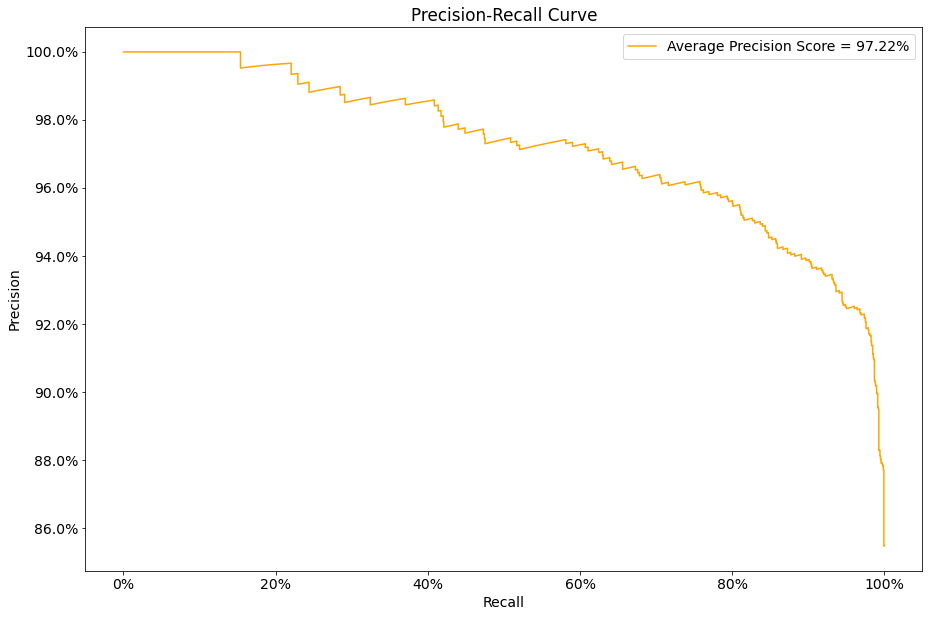

In [36]:
pr,rcl,thres = precision_recall_curve(test_labels, recon_errors)
plt.figure(figsize=(15,10))
plt.plot(rcl,pr,color='orange',label=str("Average Precision Score = "+ str('{:.2f}'.format(average_precision_score(test_labels, recon_errors)*100))+"%"))
#plt.fill_between(rcl, pr, step="pre", alpha=0.4)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
_=plt.legend()

In [38]:
thresholds = np.arange(2.0,7.2,0.2)
errors = []
for threshold in thresholds:
    predictions = get_predictions(stack[:, 1], threshold=threshold)
    conf_mat = confusion_matrix(test_labels, predictions)
    errors.append([threshold, conf_mat[1, 0], conf_mat[0, 1]])

errors = np.array(errors)

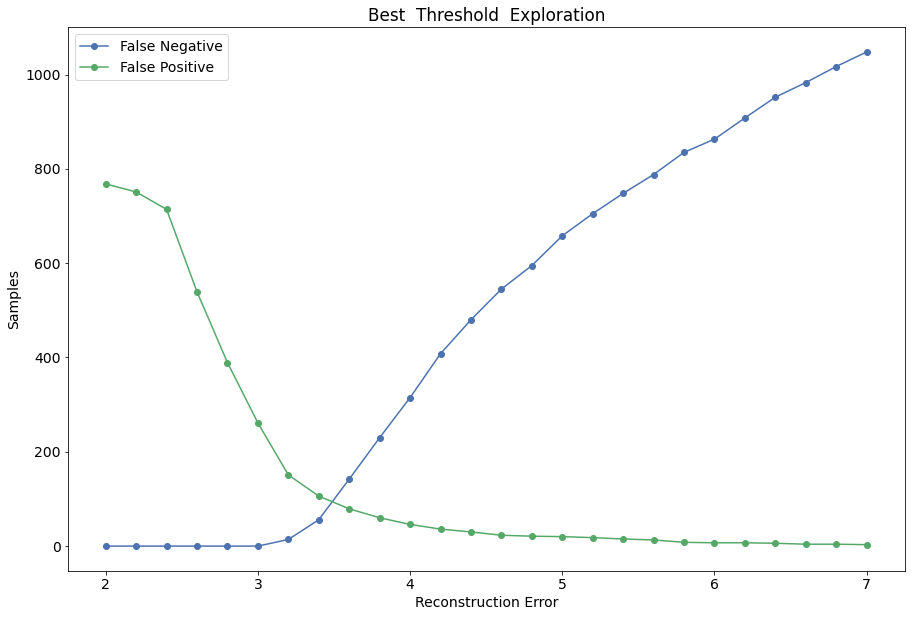

In [39]:
plt.figure(figsize=(15,10))
plt.plot(errors[:,0],errors[:,1],marker='o',label="False Negative")
plt.plot(errors[:,0],errors[:,2],marker='o',label="False Positive")
plt.title("Best  Threshold  Exploration")
plt.xlabel("Reconstruction Error")
plt.ylabel("Samples")
plt.legend()


# File Filtering/Removing Part
(Do Not Run)


In [64]:
# import os
# import shutil
# abnb=[]

In [65]:
# ress = []
# for i in recon_errors:
#Adjust the threshold accordinngly
#     if(i>=3.6):
#         ress.append("Abnormal")
#     else:
#         ress.append("Normal")

In [82]:
# count=0
# for i,j in zip(test_files,ress):
#     L=i.split('\\')
#     if(j=='Abnormal' and L[3]=='normal'):
#         print(i,j)
#         abnb.append(i)
#         count+=1
#     elif(j=='Normal' and L[3]=='abnormal'):
#         print(i,j)
#         abnb.append(i)
# #print(count)

In [69]:
# for i in abnb: 
#     L=i.split('\\')
#     destination=os.path.join('6_db_fan','REM',L[2],L[3])
#     #print(destination)
#     shutil.move(i,destination)

In [1]:
import tensorflow

In [2]:
tensorflow.__version__

'2.2.0'